In [1]:
import numpy as np
from itertools import combinations
from scipy.stats import binom
import scipy.special
import matplotlib.pyplot as plt
from scipy.stats import ortho_group

## Givens Rotations generators

In [2]:
def t_func(q_i,q_j,q_ij,l_i,l_j): 
    # t in section 3.1 Dhillon (2005) 
    delta = np.power(q_ij,2)-(q_i-l_i)*(q_j-l_i)
    if delta<0:
        print(delta)
        print("error sqrt")
    t = q_ij - np.sqrt(delta) 
    t = t/(q_j-l_i)
    return t
     
def G_func(i,j,q_i,q_j,q_ij,l_i,l_j,N): 
    # Gitens Rotation 
    G=np.eye(N) #identité 
    t = t_func(q_i,q_j,q_ij,l_i,l_j)
    c = 1/(np.sqrt(np.power(t,2)+1))
    s = t*c
    G[i,i]=c
    G[i,j]=s 
    G[j,i]= -s
    G[j,j]= c
    return G

## Initialisation by the identity matrix

In [159]:
N = 30
d = 2
Q = np.zeros((N,d))
for _ in range(0,d):
    Q[_,_] = 1
lv_scores_vector = d/N*np.ones(N)
lv_scores_vector = np.linspace(1, 1000, num=N)
lv_scores_vector = d*lv_scores_vector/(np.sum(lv_scores_vector))


I_sorting =  list(reversed(np.argsort(lv_scores_vector)))
lv_scores_vector = np.asarray(list(reversed(np.sort(lv_scores_vector))))



## Transforming an idendity matrix to an orthogonal matrix with prescribed lengths

In [4]:

i = d-1
j = d
for t in range(N-1):
    delta_i = np.abs(lv_scores_vector[i] - np.power(np.linalg.norm(Q[i,:]),2))
    delta_j = np.abs(lv_scores_vector[j] - np.power(np.linalg.norm(Q[j,:]),2))
    q_i = np.power(np.linalg.norm(Q[i,:]),2)
    q_j = np.power(np.linalg.norm(Q[j,:]),2)
    q_ij = np.dot(Q[i,:],Q[j,:].T)
    l_i = lv_scores_vector[i]
    l_j = lv_scores_vector[j]
    G = np.eye(N)
    if delta_i <= delta_j:
        l_k = q_i + q_j -l_i
        G = G_func(i,j,q_i,q_j,q_ij,l_i,l_k,N)
        Q = np.dot(G,Q)
        i = i-1
    else:
        l_k = q_i + q_j -l_j
        G = G_func(i,j,q_j,q_i,q_ij,l_j,l_k,N)
        Q = np.dot(G,Q)
        j = j+1

## Scatter the cloud of points

/Users/abelhadj/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


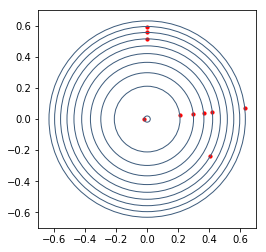

In [5]:
fig=plt.figure(1)
plt.gca().set_aspect('equal')
plt.axis([-0.7,0.7,-0.7,0.7])
ax=fig.add_subplot(1,1,1)
plt.scatter(Q[:,0], Q[:,1],marker = 'o', s=10, color = 'red')
circ_list = []
for i in range(N):
    circ_i=plt.Circle((0,0), radius=np.sqrt(lv_scores_vector[i]), color="#3F5D7D", fill=False)
    ax.add_patch(circ_i)
    #circ_list.append(circ_list)
#circ_1=plt.Circle((0,0), radius=0.1, color='g', fill=False)
#circ_2=plt.Circle((0,0), radius=0.05, color='r', fill=False)
#ax.add_patch(circ_1)
#ax.add_patch(circ_2)
plt.show()

#### We observe that almost all the points are aligned with the canonical axis

## Build eigensteps

## Build a frame given an eigensteps

In [6]:
#E_test_1 = np.matrix('0 0 0 0 0.666 1.666;0 0 0.333 1.333 1.666 1.666;0 1.0 1.666 1.666 1.666 1.666')

In [7]:
E_test_1 = np.matrix('0 1.0 1.666 1.666 1.666 1.666;0 0 0.333 1.333 1.666 1.666;0 0 0 0 0.666 1.666')

In [8]:
E_test_1

matrix([[ 0.   ,  1.   ,  1.666,  1.666,  1.666,  1.666],
        [ 0.   ,  0.   ,  0.333,  1.333,  1.666,  1.666],
        [ 0.   ,  0.   ,  0.   ,  0.   ,  0.666,  1.666]])

In [9]:
E_2 = 3/5*E_test_1

In [10]:
[d,N] = np.shape(E_test_1) ## The dimensions of the eigensteps matrix

In [11]:
def get_index_lists_I_and_J(E,n,N,d):
    I_n = list(range(d))
    J_n = list(range(d))
    n_ = n+1
    for m in reversed(range(d)):
        if E[m,n_-1] in E[J_n,n_]:
            del I_n[m]
            t_J_n = [i for i in J_n if E[i,n_] == E[m,n_-1] ]
            m_max = max(t_J_n)
            del J_n[m_max]
    return I_n,J_n

In [12]:
def diff_of_lists(first, second):
        second = set(second)
        return [item for item in first if item not in second]

In [13]:
def get_permutation_I(I_n,d):
    permutation = [0]*d
    r_n = np.shape(I_n)[0]
    complementary_I_n = diff_of_lists(list(range(d)),I_n)
    c_r_n = d-r_n
    for i in range(r_n):
        permutation[I_n[i]] = i
    for i in range(c_r_n):
        permutation[complementary_I_n[i]] = i + r_n
    return permutation

In [14]:
def d_minus_x(x):
    return d-x-1

In [15]:
def get_v_n_w_n(E,I_n,J_n,d,n):
    r_n = np.shape(I_n)[0]
    v_n = np.zeros((r_n))
    w_n = np.zeros((r_n))
    permutation_I_n = get_permutation_I(I_n,d)
    permutation_J_n = get_permutation_I(J_n,d)
    #print(n)
    for m in I_n:
        #print(m)
        #print(d_minus_x(m))
        v_n_index = permutation_I_n[m]
        nom_v_n = E[m,n]*np.ones((r_n,1)) - E[list(J_n),n+1]
        I_n_without_m = diff_of_lists(I_n,[m])
        cardinal_I_n_without_m = np.shape(I_n_without_m)[0]
        denom_v_n = E[m,n]*np.ones((cardinal_I_n_without_m,1)) - E[list(I_n_without_m),n]
        v_n[v_n_index] = np.sqrt(-np.prod(nom_v_n)/np.prod(denom_v_n))
    for m in J_n:
        w_n_index = permutation_J_n[m]
        nom_w_n = E[m,n+1]*np.ones((r_n,1)) - E[list(I_n),n]
        J_n_without_m = diff_of_lists(J_n,[m])
        cardinal_J_n_without_m = np.shape(J_n_without_m)[0]
        denom_w_n = E[m,n+1]*np.ones((cardinal_J_n_without_m,1)) - E[list(J_n_without_m),n+1]
        w_n[w_n_index] = np.sqrt(np.prod(nom_w_n)/np.prod(denom_w_n))
        
    return v_n,w_n

In [16]:
def get_permutation_matrix(permutation,d):
    permutation_matrix = np.zeros((d,d))
    for i in range(d):
        for j in range(d):
            if i == permutation[j]:
                permutation_matrix[i,j] = 1
    return permutation_matrix

In [17]:
def get_W_n_matrix(E,I_n,J_n,d,n):
    r_n = np.shape(I_n)[0]
    v_n,w_n = get_v_n_w_n(E,I_n,J_n,d,n)
    W_n_matrix = np.zeros((r_n,r_n))
    permutation_I_n = get_permutation_I(I_n,d)
    permutation_J_n = get_permutation_I(J_n,d)
    for m in I_n:
        for m_ in J_n:
            v_n_index = permutation_I_n[m]
            w_n_index = permutation_J_n[m_]
            W_n_matrix[v_n_index,w_n_index] = 1/(E[m_,n+1]-E[m,n])*v_n[v_n_index]*w_n[w_n_index]
    return W_n_matrix

In [18]:
def get_padded_vector(v,d):
    r_n = np.shape(v)[0]
    v_padded = np.zeros((d,))
    v_padded[0:r_n] = v
    return v_padded

In [19]:
def get_extended_matrix_W(W_n_matrix,d):
    r_n = np.shape(W_n_matrix)[0]
    W_extended = np.eye(d)
    W_extended[0:r_n,0:r_n] = W_n_matrix
    return W_extended

In [20]:
def get_F(d,N,E,mu_vector):
    F_test = np.zeros((d,N))
    U_n_1 = np.eye(d)
    for n in range(N):
        #print(n)
        if n ==0:
            M = np.eye(d)
            F_test[:,n],U_n_1 = get_F_n_U_n(n+1,d,N,E,mu_vector,M)
        else:
            F_test[:,n],U_n_1 = get_F_n_U_n(n+1,d,N,E,mu_vector,U_n_1)
    return F_test

In [21]:
n = 4  ## The "level" 
I_n,J_n = get_index_lists_I_and_J(E_test_1,n,N,d)

In [22]:
permutation_I_n = get_permutation_I(I_n,d)

permutation_matrix_I_n = get_permutation_matrix(permutation_I_n,d)

permutation_J_n = get_permutation_I(J_n,d)

permutation_matrix_J_n = get_permutation_matrix(permutation_J_n,d)

In [23]:
I_n

[2]

In [24]:
J_n

[0]

In [25]:
permutation_I_n

[1, 2, 0]

In [26]:
permutation_J_n

[0, 1, 2]

In [27]:
permutation_matrix_I_n

array([[ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.]])

In [28]:
permutation_matrix_J_n

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [29]:
v_n,w_n = get_v_n_w_n(E_test_1,I_n,J_n,d)

TypeError: get_v_n_w_n() missing 1 required positional argument: 'n'

In [30]:
print(v_n)

NameError: name 'v_n' is not defined

In [31]:
print(w_n)

NameError: name 'w_n' is not defined

In [32]:
W_n_matrix = get_W_n_matrix(E_test_1,I_n,J_n,d,n)

In [33]:
W_n_matrix 

array([[ 1.]])

In [34]:
W_extended_test = get_extended_matrix_W(W_n_matrix,d)

In [35]:
def get_U_n_saved(n,d,N,E,V_n,U_n_1):    
    if n==1:
        return np.eye(d)
    else:

        I_n,J_n = get_index_lists_I_and_J(E,n-1,N,d)
        r_n = np.shape(I_n)[0]
        permutation_matrix_I_n = get_permutation_matrix(get_permutation_I(I_n,d),d)
        permutation_matrix_J_n = get_permutation_matrix(get_permutation_I(J_n,d),d)
        v_n,w_n = get_v_n_w_n(E,I_n,J_n,d,n-1)
        W_n_matrix = get_W_n_matrix(E,I_n,J_n,d,n-1)
        W_extended = get_extended_matrix_W(get_W_n_matrix(E,I_n,J_n,d,n-1),d)
        U_n = np.zeros((d,d))
        U_n_plus_one = np.dot(np.dot(np.dot(np.dot(U_n_1,V_n),np.transpose(permutation_matrix_I_n)),W_extended),permutation_matrix_J_n)
        return U_n_plus_one

In [36]:
def get_U_n(n,d,N,E,V_n,U_n_1):    
    if n==1:
        return np.eye(d)
    else:

        I_n,J_n = get_index_lists_I_and_J(E,n-1,N,d)
        r_n = np.shape(I_n)[0]
        permutation_matrix_I_n = get_permutation_matrix(get_permutation_I(I_n,d),d)
        permutation_matrix_J_n = get_permutation_matrix(get_permutation_I(J_n,d),d)
        v_n,w_n = get_v_n_w_n(E,I_n,J_n,d,n-1)
        W_n_matrix = get_W_n_matrix(E,I_n,J_n,d,n-1)
        W_extended = get_extended_matrix_W(get_W_n_matrix(E,I_n,J_n,d,n-1),d)
        U_n = np.zeros((d,d))
        U_n_plus_one = np.dot(np.dot(np.dot(np.dot(U_n_1,V_n),np.transpose(permutation_matrix_I_n)),W_extended),permutation_matrix_J_n)
        return U_n_plus_one

In [37]:
U_n_test = get_U_n(4,d,N,E_test_1)

TypeError: get_U_n() missing 2 required positional arguments: 'V_n' and 'U_n_1'

In [ ]:
U_n_test

In [ ]:
np.dot(U_n_test,U_n_test.T)

In [38]:
def generate_random_diagonal_unimodular_matrix(d):
    vector = np.ones((1,d)) - 2*np.random.binomial(1, 0.5, d)
    return np.diag(vector[0])
    #return np.eye(d)

In [39]:
def get_F_n_U_n(n,d,N,E,mu_vector,U_n_1):
    #print(n)
    if n==1:
        M = np.eye(d)
        v = np.sqrt(mu_vector[0])*M[:,0]
        return v,np.eye(d)
    I_n,J_n = get_index_lists_I_and_J(E,n-1,N,d)
    r_n = np.shape(I_n)[0]
    permutation_matrix_I_n = get_permutation_matrix(get_permutation_I(I_n,d),d)
    permutation_matrix_J_n = get_permutation_matrix(get_permutation_I(J_n,d),d)
    v_n,w_n = get_v_n_w_n(E,I_n,J_n,d,n-1)
    W_extended = get_extended_matrix_W(get_W_n_matrix(E,I_n,J_n,d,n-1),d)
    v_padded = get_padded_vector(v_n,d)
    #V_n = np.eye()
    V_n = generate_random_diagonal_unimodular_matrix(d)
    #_,U_n_1 = get_F_n_U_n(n-1,d,N,E,mu_vector)
    #get_U_n(n,d,N,E,V_n,U_n_1)
    U_n = np.dot(np.dot(np.dot(np.dot(U_n_1,V_n),np.transpose(permutation_matrix_I_n)),W_extended),permutation_matrix_J_n)
    f_n = np.dot(np.dot(np.dot(U_n_1,V_n),np.transpose(permutation_matrix_I_n)),v_padded)
    return f_n,U_n

In [40]:
def get_F_n(n,d,N,E):
    #print(n)
    if n==1:
        M = np.eye(d)
        v = M[:,0]
        return v
    I_n,J_n = get_index_lists_I_and_J(E,n-1,N,d)
    r_n = np.shape(I_n)[0]
    permutation_matrix_I_n = get_permutation_matrix(get_permutation_I(I_n,d),d)
    permutation_matrix_J_n = get_permutation_matrix(get_permutation_I(J_n,d),d)
    v_n,w_n = get_v_n_w_n(E,I_n,J_n,d,n-1)
    W_extended = get_extended_matrix_W(get_W_n_matrix(E,I_n,J_n,d,n-1),d)
    v_padded = get_padded_vector(v_n,d)
    V_n = generate_random_diagonal_unimodular_matrix(d)
    U_n_1 = get_U_n(n-1,d,N,E,V_n)
    f_n = np.dot(np.dot(np.dot(U_n_1,V_n),np.transpose(permutation_matrix_I_n)),v_padded)
    return f_n

In [41]:
F_test_1,_ = get_F_n_U_n(2,d,N,E_test_1)

TypeError: get_F_n_U_n() missing 2 required positional arguments: 'mu_vector' and 'U_n_1'

In [80]:
print(F_test_1)

[ 0.30472354  0.95191573  0.        ]


In [ ]:
print(np.sqrt(5)/np.sqrt(6))

In [84]:
F_test = get_F(d,N-1,E_test_1)

In [ ]:
print(d)

In [ ]:
print(N)

In [ ]:
F_test.T

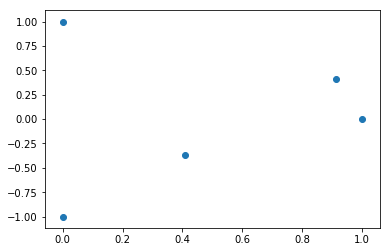

In [85]:
plt.scatter(F_test[0,:], F_test[1,:])
plt.show()

## Create an eigensteps

In [44]:
N = 5
d = 3

E = np.zeros((N,N)) #(d,N)
mu_vector = np.asarray([0.6,0.6,0.6,0.6,0.6])
lambda_vector = np.asarray([1,1,1,0,0])


In [45]:
# Initialisation
E[:,N-1] = lambda_vector

In [46]:
E

array([[ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [47]:
for n in range(N-2,-1,-1):#iter([N-2,N-3,N-4,N-5,N-6]):
    #print(n)
    if n > -1:
        #print(list(range(n, 0, -1)))
        for k in range(n, -1, -1):
            #print("k is")
            #print(k)
            #n -> N-2
            #n+1 -> N-1
            #k_aux = k+1
            #print(n)
            A_n_1_k = max(E[k+1,n+1],np.sum(E[k:n+2,n+1])-np.sum(E[k+1:n+1,n])-mu_vector[n+1])
            B_array = np.zeros(k+1)
            for l in range(k+1):
                B_array[l] = np.sum(mu_vector[l:n+1])-np.sum(E[l+1:k+1,n+1])-np.sum(E[k+1:n+1,n])
                #print(l)
            #print(B_array)
            B_n_1_k = min(E[k,n+1],min(B_array))
            #print("n is:")
            #print(n)
            #print("k is:")
            #print(k)
            #print("E[k,n+1] is")
            #print(E[k,n+1])
            #print("B_n_1_k is:")
            #print(B_n_1_k)
            
            E[k,n] = (A_n_1_k+B_n_1_k)/2
            #print(A_n_1_k)
            #print(B_n_1_k)

In [48]:

E_column_sum = np.zeros((N))
for n in range(N):
    E_column_sum[n] = np.sum(E[:,n])

In [49]:
E_column_sum

array([ 0.6,  1.2,  1.8,  2.4,  3. ])

In [50]:
E

array([[ 0.6,  0.8,  1. ,  1. ,  1. ],
       [ 0. ,  0.4,  0.6,  1. ,  1. ],
       [ 0. ,  0. ,  0.2,  0.4,  1. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ]])

In [51]:
def get_eigensteps_random(mu_vector,lambda_vector,N,d):
    E = np.zeros((N,N)) #(d,N)
    E[:,N-1] = lambda_vector
    for n in range(N-2,-1,-1):
        #print(n)
        for k in range(n, -1, -1):
            A_n_1_k = max(E[k+1,n+1],np.sum(E[k:n+2,n+1])-np.sum(E[k+1:n+1,n])-mu_vector[n+1])
            B_array = np.zeros(k+1)
            for l in range(k+1):
                B_array[l] = np.sum(mu_vector[l:n+1])-np.sum(E[l+1:k+1,n+1])-np.sum(E[k+1:n+1,n])
            B_n_1_k = min(E[k,n+1],min(B_array))
            u = np.random.uniform(0,1)
            delta_n_1_k = B_n_1_k - A_n_1_k
            E[k,n] = A_n_1_k + u*delta_n_1_k
    return E

In [52]:
def get_eigensteps_mean(mu_vector,lambda_vector,N,d):
    E = np.zeros((N,N)) #(d,N)
    E[:,N-1] = lambda_vector
    for n in range(N-2,-1,-1):
        #print(n)
        for k in range(n, -1, -1):
            A_n_1_k = max(E[k+1,n+1],np.sum(E[k:n+2,n+1])-np.sum(E[k+1:n+1,n])-mu_vector[n+1])
            B_array = np.zeros(k+1)
            for l in range(k+1):
                B_array[l] = np.sum(mu_vector[l:n+1])-np.sum(E[l+1:k+1,n+1])-np.sum(E[k+1:n,n])
            B_n_1_k = min(E[k,n+1],min(B_array))
            u = np.random.uniform(0,1)
            E[k,n] = A_n_1_k
    return E

In [181]:
N= 30
d = 2
E = np.zeros((N,N)) #(d,N)
#mu_vector = d/N*np.ones((N,1))
mu_vector = lv_scores_vector

lambda_vector = np.zeros((N))
lambda_vector[0:d] = np.ones((d))

In [182]:
#mu_vector = np.linspace(1, 0.1, num=N)
#sum_mu_vector = np.sum(mu_vector)
#mu_vector = d/sum_mu_vector*mu_vector

#mu_vector = d/N*np.ones((N,1))

In [183]:

E_test = get_eigensteps_random(mu_vector,lambda_vector,N,d)
E_ = np.zeros((d,N+1))
for i in range(d):
    E_[i,1:N+1] = E_test[i,:] 
F_test = get_F(d,N,np.asmatrix(E_),mu_vector)


In [184]:
E_column_sum = np.zeros((N,1))
for n in range(N):
    E_column_sum[n] = np.sum(E_test[:,n])


/Users/abelhadj/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


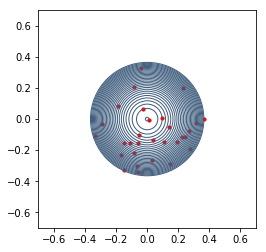

In [185]:
#plt.scatter(F_test[0,0:N], F_test[1,0:N])
#
#plt.show()

fig=plt.figure(1)
plt.gca().set_aspect('equal')
plt.axis([-0.7,0.7,-0.7,0.7])
ax=fig.add_subplot(1,1,1)
plt.scatter(F_test[0,:], F_test[1,:],marker = 'o', s=10, color = 'red')
circ_list = []
for i in range(N):
    circ_i=plt.Circle((0,0), radius=np.sqrt(lv_scores_vector[i]), color="#3F5D7D", fill=False)
    ax.add_patch(circ_i)
    #circ_list.append(circ_list)
#circ_1=plt.Circle((0,0), radius=0.1, color='g', fill=False)
#circ_2=plt.Circle((0,0), radius=0.05, color='r', fill=False)
#ax.add_patch(circ_1)
#ax.add_patch(circ_2)
plt.show()

In [186]:
np.dot(F_test[:,0:N],F_test[:,0:N].T)

array([[  1.00000000e+00,  -2.41993925e-16],
       [ -2.41993925e-16,   1.00000000e+00]])

In [187]:
np.diag(np.dot(F_test[:,0:N].T,F_test[:,0:N]))

array([ 0.13320013,  0.12861162,  0.1240231 ,  0.11943459,  0.11484607,
        0.11025756,  0.10566904,  0.10108053,  0.09649201,  0.0919035 ,
        0.08731498,  0.08272647,  0.07813795,  0.07354944,  0.06896092,
        0.06437241,  0.05978389,  0.05519538,  0.05060686,  0.04601835,
        0.04142983,  0.03684132,  0.0322528 ,  0.02766429,  0.02307577,
        0.01848726,  0.01389874,  0.00931023,  0.00472172,  0.0001332 ])

In [188]:
mu_vector

array([  1.33200133e-01,   1.28611618e-01,   1.24023103e-01,
         1.19434588e-01,   1.14846073e-01,   1.10257559e-01,
         1.05669044e-01,   1.01080529e-01,   9.64920137e-02,
         9.19034988e-02,   8.73149839e-02,   8.27264689e-02,
         7.81379540e-02,   7.35494391e-02,   6.89609241e-02,
         6.43724092e-02,   5.97838943e-02,   5.51953793e-02,
         5.06068644e-02,   4.60183495e-02,   4.14298345e-02,
         3.68413196e-02,   3.22528047e-02,   2.76642897e-02,
         2.30757748e-02,   1.84872599e-02,   1.38987449e-02,
         9.31023000e-03,   4.72171507e-03,   1.33200133e-04])

In [69]:
iterativ_lv_list = []
lv_0 = [d/N]*N

F_test

np.diag(np.dot(F_test[:,0:N].T,F_test[:,0:N]))

array([ 0.3996004 ,  0.35524476,  0.31088911,  0.26653347,  0.22217782,
        0.17782218,  0.13346653,  0.08911089,  0.04475524,  0.0003996 ])

In [73]:
F_test[:,0]

array([ 0.63213954,  0.        ])

In [75]:
def get_new_cov_matrix(V,x):
    new_V = get_new_V(V,x)
    new_sigma = np.dot(new_V,np.transpose(new_V))
    return new_sigma

In [76]:
def get_new_V(V,x):
    sqrt_x = np.sqrt(x)
    new_V = np.dot(V,np.diag(sqrt_x))
    return new_V

In [141]:
def get_new_x(V,x):
    new_V = get_new_V(V,x)
    new_sigma = get_new_cov_matrix(V,x)
    new_x = 9/2*np.diag(np.dot(np.dot(np.transpose(new_V),np.linalg.inv(new_sigma)),new_V))
#    N = len(new_x)
#    for n in list(range(N)):
#        if new_x[n] >1:
#            new_x[n] = 1
    return new_x

In [80]:
N

10

In [167]:
new_x_ = get_new_x(F_test,lv_0)

In [168]:
new_x_

array([ 0.5994006 ,  0.57875228,  0.55810397,  0.53745565,  0.51680733,
        0.49615901,  0.4755107 ,  0.45486238,  0.43421406,  0.41356574,
        0.39291743,  0.37226911,  0.35162079,  0.33097248,  0.31032416,
        0.28967584,  0.26902752,  0.24837921,  0.22773089,  0.20708257,
        0.18643426,  0.16578594,  0.14513762,  0.1244893 ,  0.10384099,
        0.08319267,  0.06254435,  0.04189603,  0.02124772,  0.0005994 ])

In [169]:
np.diag(np.dot(F_test[:,0:N].T,F_test[:,0:N]))

array([ 0.13320013,  0.12861162,  0.1240231 ,  0.11943459,  0.11484607,
        0.11025756,  0.10566904,  0.10108053,  0.09649201,  0.0919035 ,
        0.08731498,  0.08272647,  0.07813795,  0.07354944,  0.06896092,
        0.06437241,  0.05978389,  0.05519538,  0.05060686,  0.04601835,
        0.04142983,  0.03684132,  0.0322528 ,  0.02766429,  0.02307577,
        0.01848726,  0.01389874,  0.00931023,  0.00472172,  0.0001332 ])

In [189]:
T = 10000
c = 9
iterative_lv_list = []
lv_0 = [c/N]*N
iterative_lv_list.append(lv_0)
current_lv =lv_0 
for t in list(range(T)):
    new_lv_ = get_new_x(F_test,current_lv)
    iterative_lv_list.append(new_lv_)
    current_lv = new_lv_

In [190]:
iterative_lv_list

[[0.3,
  0.3,
  0.3,
  0.3,
  0.3,
  0.3,
  0.3,
  0.3,
  0.3,
  0.3,
  0.3,
  0.3,
  0.3,
  0.3,
  0.3,
  0.3,
  0.3,
  0.3,
  0.3,
  0.3,
  0.3,
  0.3,
  0.3,
  0.3,
  0.3,
  0.3,
  0.3,
  0.3,
  0.3,
  0.3],
 array([ 0.5994006 ,  0.57875228,  0.55810397,  0.53745565,  0.51680733,
         0.49615901,  0.4755107 ,  0.45486238,  0.43421406,  0.41356574,
         0.39291743,  0.37226911,  0.35162079,  0.33097248,  0.31032416,
         0.28967584,  0.26902752,  0.24837921,  0.22773089,  0.20708257,
         0.18643426,  0.16578594,  0.14513762,  0.1244893 ,  0.10384099,
         0.08319267,  0.06254435,  0.04189603,  0.02124772,  0.0005994 ]),
 array([  8.68980902e-01,   8.12862149e-01,   7.39512343e-01,
          7.15324032e-01,   6.76682100e-01,   6.23200029e-01,
          5.79833614e-01,   5.03569829e-01,   4.65851353e-01,
          4.05019849e-01,   3.70472371e-01,   3.31525048e-01,
          3.05870428e-01,   2.74593785e-01,   2.43672514e-01,
          2.10567328e-01,   1.83786184e

In [162]:
x

array([[-0.47128663,  0.09340299, -0.8770204 ],
       [ 0.67864901, -0.59669884, -0.42823595],
       [-0.56331557, -0.7970109 ,  0.21782834]])

In [161]:
x = ortho_group.rvs(3)

In [164]:
def list_duplicates(seq):
    seen = set()
    seen_add = seen.add
    return [idx for idx,item in enumerate(seq) if item in seen or seen_add(item)]

print(list_duplicates([1, 2, 3, 2, 1, 5, 6, 5, 5, 5]))
# [3, 4, 7, 8, 9]

[3, 4, 7, 8, 9]


In [105]:
import math

In [116]:
new_matrix = np.zeros((2,5))

In [117]:
#np.cos?
math.pi

3.141592653589793

In [144]:
for t in range(5):
    print(np.cos(2*math.pi*t/5))
    print(np.sin(2*math.pi*t/5))
    new_matrix[0,t] = np.cos(2*math.pi*t/5)
    new_matrix[1,t] = np.sin(2*math.pi*t/5)

1.0
0.0
0.309016994375
0.951056516295
-0.809016994375
0.587785252292
-0.809016994375
-0.587785252292
0.309016994375
-0.951056516295


In [146]:
0.309016994375*0.951056516295-0.809016994375*0.587785252292


-0.18163563200098576

In [120]:
new_matrix

array([[ 1.        ,  0.30901699, -0.80901699, -0.80901699,  0.30901699],
       [ 0.        ,  0.95105652,  0.58778525, -0.58778525, -0.95105652]])

In [121]:
np.dot(new_matrix,new_matrix.T)

array([[  2.50000000e+00,   5.55111512e-17],
       [  5.55111512e-17,   2.50000000e+00]])

In [122]:
np.dot(new_matrix[:,0:3],new_matrix[:,0:3].T)

array([[ 1.75      , -0.18163563],
       [-0.18163563,  1.25      ]])

In [124]:
np.linalg.det(np.dot(new_matrix[:,0:3],new_matrix[:,0:3].T))

2.1545084971874737

In [148]:
np.sin(2*math.pi*2/5)+np.sin(2*math.pi*4/5)

-0.36327126400268039

In [130]:
new_matrix[:,0:3]

array([[ 1.        ,  0.30901699, -0.80901699],
       [ 0.        ,  0.95105652,  0.58778525]])